In [232]:
import rdkit
from rdkit.Chem import AllChem
import pandas as pd
import os
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit import Chem
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit import DataStructs

In [122]:
import json
with open('/home/datahouse1/caoduanhua/MolGens/SelfConstructedBenchmark/crossdock2020_duplicated_uniprotId_map_smiles_in_trainset.json','r') as f:
    crossdock2020_duplicated_uniprotId_map_smiles_in_trainset = json.load(f)

In [130]:

def get_trainset_scaffold(x,ref_map):
    uniprot_id  = x['UniprotID']
    if uniprot_id not in ref_map:
        return []
    else:
        all_find_scaffold = [i[1:-1] for i in x.Finded_Scaffolds[1:-1].split(', ')]
        all_find_scaffold = [Chem.MolToSmiles(Chem.MolFromSmiles(i)) for i in all_find_scaffold if i != '']
        ref_scaffolds = [Chem.MolToSmiles(Chem.MolFromSmiles(i)) for i in ref_map[uniprot_id]['scaffold'] if i != '']
        list_dup_scaffolds = list(set(all_find_scaffold).intersection(set(ref_scaffolds)))
        return list_dup_scaffolds
def get_trainset_smiles(x,ref_map):
    uniprot_id  = x['UniprotID']
    if uniprot_id not in ref_map:
        return []
    else:
        all_find_smiles = [i[1:-1] for i in x.Finded_Smiles[1:-1].split(', ')]
        all_find_smiles = [Chem.MolToSmiles(Chem.MolFromSmiles(i)) for i in all_find_smiles if i != '']
        ref_smiles = [Chem.MolToSmiles(Chem.MolFromSmiles(i)) for i in ref_map[uniprot_id]['smiles'] if i != '']
        list_dup_smiles = list(set(all_find_smiles).intersection(set(ref_smiles)))
    
        return list_dup_smiles
# merged_result_pd['smilesInTrainset'] = merged_result_pd.apply(lambda x: get_trainset_smiles(x,crossdock2020_duplicated_uniprotId_map_smiles_in_trainset),axis = 1)

In [131]:
all_result_path = '/home/datahouse1/caoduanhua/MolGens/SelfConstructedBenchmark/AnalysisResults/molecule_scaffold_recovery'
all_results = os.listdir(all_result_path)
all_results_pd = []

for temp_path in all_results:
    model_name = os.path.splitext(temp_path)[0]
    temp_path = os.path.join(all_result_path, temp_path)
    temp_pd = pd.read_csv(temp_path)
    temp_pd['ModelName'] = [model_name]*len(temp_pd)
    
    temp_pd['FindedScaffoldIsInTrainset'] = temp_pd.apply(lambda x :len(get_trainset_scaffold(x, crossdock2020_duplicated_uniprotId_map_smiles_in_trainset)), axis=1)
    temp_pd['FindedSmilesIsInTrainset'] = temp_pd.apply(lambda x :len(get_trainset_smiles(x, crossdock2020_duplicated_uniprotId_map_smiles_in_trainset)), axis=1)
    all_results_pd.append(temp_pd)


In [64]:
# temp_pd
# all_results_pd

In [132]:
merged_result_pd = pd.concat(all_results_pd,axis = 0)#['ModelName'].value_counts()

In [302]:
merged_result_pd['Dupliceted_UniprotID'] = merged_result_pd['UniprotID'].apply(lambda x: x in crossdock2020_duplicated_uniprotId_map_smiles_in_trainset)

In [303]:
merged_result_pd

,Unnamed: 0,UniprotID,Reference_Smiles,Generated_Smiles,Reference_Smiles_num,Finded_Smiles,Finded_Smiles_Num,Reference_Scaffolds,Reference_Scaffolds_Num,Generated_Scaffolds,Generated_Scaffolds_Num,Finded_Scaffolds,Finded_Scaffolds_Frequency,Finded_Scaffolds_Frequency_Rate,Finded_Scaffolds_Num,Finded_Scaffolds_Rate,ModelName,FindedScaffoldIsInTrainset,FindedSmilesIsInTrainset,Dupliceted_UniprotID
0,0,P53779,['CS(=O)(=O)Nc1ccc(-c2cnc3cccc(Nc4ccc(Cl)cn4)c...,"['Fc1cc(NC2CCCCC2)ccc1[NH+:1]=[O:1]', 'Cc1cc(B...",1041,[],0,"['O=C(CSc1nc2nncc-2cn1-c1ccccc1)Nc1cc[nH]n1', ...",563,"['', 'C1=C[C@:1]23C=CC=N[C@@:1]2(C=C1)[CH:1]=[...",127,['c1ccccc1'],18,0.095238,1,0.001776,FLAG,0,0,False
1,1,P28845,['O=C(c1ccc(C(F)(F)F)cc1)N1CCC(n2c(=O)[nH]c3cc...,['CC(=O)[C@@H](C)[C@@]1(O)[C@H](C)O[C@:1]2([C@...,3275,[],0,"['O=C(NC1CCCCC1)c1cnn(-c2ccccc2)c1', 'O=C(CC1C...",1281,"['', 'c1cn(C2CCCCC2)cn1', 'c1n[c:1]2[c:1](n1C1...",40,['c1ccccc1'],4,0.066667,1,0.000781,FLAG,0,0,True
2,2,Q9H2K2,['COc1cc2ncnc(N3CCC(CN4Cc5ccccc5NC4=O)CC3)c2cc...,['CN(C)S(C)(=O)(c1ccccc1)N(C)[S:1][NH:1][CH3:2...,681,[],0,['O=C(c1ccccc1)C1CCN(CC(=O)N(Cc2nc3c(c(=O)[nH]...,324,"['', 'c1ccc(O[C@@H:1]2[CH2:1][CH2:1][CH2:1][CH...",55,[],0,0.000000,0,0.000000,FLAG,0,0,True
3,3,P41145,['CN(C(=O)Cc1cccc2sccc12)[C@@H]1CCCCC[C@H]1N1C...,['CC1=C[C@@:1]2(N3CCCC3)[CH:1]=[C:1](C)[NH:1][...,3853,[],0,"['', 'c1ccc(CCC2CCCCN2Cc2cncs2)cc1', 'O=C(Nc1c...",1788,"['', 'c1cncc(-[c:1]2[cH:1][cH:1][n:1][cH:1][n:...",112,"['', 'c1ccccc1']",15,0.102041,2,0.001119,FLAG,0,0,True
4,4,O14757,['CCn1c(=O)c2c(C)[nH]nc2c2cc3c(cc21)CN(C(=O)NC...,"['Cc1c(Cl)c(N)c2cn[c:1]([Cl:1])nc2c1CO', 'Cc1c...",1950,[],0,['O=C1NC(=O)c2c1c(-c1ccccc1)cc1c2c2ccccc2n1CC[...,923,"['', 'O=c1c[cH:1]c2ncc(-c3cscn3)cc2[nH]1', 'O=...",163,[],0,0.000000,0,0.000000,FLAG,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,106,P05979,['COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccc(Cl)cc5)nn...,"['CN(C)c1ccc(CCO)cc1', 'OCCc1ccc(CO)o1', 'CCO[...",689,[],0,"['', 'O=C(Cc1ccccc1Nc1ccccc1)OCc1cc(=O)n(-c2cc...",274,"['', 'O=C1CCCCCN1', 'O=C1CC[C@@H](c2ccccc2)C1'...",390,"['', 'c1ccc(-c2ccccc2)cc1', 'c1ccc(-c2nncs2)cc...",353,0.404353,11,0.040146,DecompDiff,4,0,True
107,107,P08581,['C[C@@H](Oc1c[nH]c(=O)c(C(=O)Nc2ccccc2)c1)c1c...,"['CCCCC[C@H](C)CCC[C@@H]1CCCNC1=O', 'CCCN1c2cc...",3496,[],0,"['c1cc(NCc2cccc3nonc23)c2cc(N3CCNCC3)cnc2c1', ...",1469,"['', 'O=C1N=C[C@H]2CC3CCCN4CN[C@H](C12)C34', '...",554,['c1ccccc1'],79,0.084222,1,0.000681,DecompDiff,0,0,False
108,108,O60885,"['CCc1c(NCc2ccccc2N2CCN(C)CC2)cnn(C)c1=O', 'CC...","['CC[C@@H](C)NC(C)=O', 'CC(C)Oc1ccccc1N=C1C[C@...",3870,[],0,"['c1ccc(N[C@@H]2CCNc3ccccc32)cc1', 'c1ccc(Cc2c...",1738,"['', 'C=C1COCO1', 'C1=NC=C(CC2CCCC2)C1', 'O=C1...",263,['c1ccccc1'],79,0.099496,1,0.000575,DecompDiff,1,0,True
109,109,P43490,['O=C(Nc1ccc(C(=O)N2CC3COCC3C2)cc1)N1Cc2ccccc2...,['C=C[C@@H]1C=CN[C@@H](CO)[C@@H]2[C@H](COC)ON2...,2364,[],0,['O=C(Nc1ccc(C(=O)N2CC3COCC3C2)cc1)N1Cc2ccccc2...,1229,"['', 'C=C1CCC2C=CC3C[C@H]4C[C@H]4O[C@@H]3CC2C1...",379,[],0,0.000000,0,0.000000,DecompDiff,0,0,True


In [139]:
merged_result_pd[merged_result_pd['FindedScaffoldIsInTrainset']!=0]

,Unnamed: 0,UniprotID,Reference_Smiles,Generated_Smiles,Reference_Smiles_num,Finded_Smiles,Finded_Smiles_Num,Reference_Scaffolds,Reference_Scaffolds_Num,Generated_Scaffolds,Generated_Scaffolds_Num,Finded_Scaffolds,Finded_Scaffolds_Frequency,Finded_Scaffolds_Frequency_Rate,Finded_Scaffolds_Num,Finded_Scaffolds_Rate,ModelName,FindedScaffoldIsInTrainset,FindedSmilesIsInTrainset
17,17,P49841,"['c1cc2[nH]ncc2cc1-c1cc(CN2CCCCC2)no1', 'COCCn...",['CC1=C[C@:1]23C(O)=NC(Cl)=C[C@@:1]2(O1)[N:1]=...,2592,[],0,"['', 'O=C(NCCCc1ccccc1)c1cccc2[nH]c(-c3ccccc3)...",1141,['C1=C[C@@]23C=C[CH:1]=N[C@]2(N=C1)C1=C(OCO1)C...,171,"['c1ccccc1', 'c1ccc2ncccc2c1']",8,0.039801,2,0.001753,FLAG,1,0
24,24,Q14145,['CC(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CCC(=O)O)...,['CN[C@H]1COC[C@H](S)[C@@:1]12[O:1][C:1]1([C@@...,283,[],0,['O=C1OC[C@@H](NC(=O)[C@@H]2CCCN2C(=O)c2ccon2)...,130,"['', 'O=C(NC1CCCCC1)N1CCCCC1', 'c1cnc2[nH][c:1...",59,['c1ccccc1'],10,0.112360,1,0.007692,FLAG,1,0
26,26,P00734,['CNCCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc...,['O=C1CC[C@H]([NH2+]C2CCCCC2)C[C@]1(O)N[S@H:1]...,4198,[],0,"['', 'O=C(NC1CCCC1)C(Cc1ccccc1)NS(=O)(=O)c1ccc...",1877,"['', 'c1ccc([S:1](O[NH2+]C2CC2)=[O:2])cc1', 'C...",22,"['', 'C1CCNCC1']",3,0.125000,2,0.001066,FLAG,1,0
29,29,Q02127,"['Cc1ccc(Nc2cnc(-c3ccccc3Cl)nc2)c(C(=O)O)c1', ...",['C[C@@H]([C@H](C(F)(F)F)[C@@H:1]([NH3+:1])[CH...,983,[],0,['O=C(Nc1ccccc1)c1ccc(-n2nc[nH]c2=O)nc1OC1CCOC...,302,"['', 'C1CC[C@H:1]2[CH2:1][CH2:1][C@H:1](C3CC3)...",28,['c1ccccc1'],6,0.146341,1,0.003311,FLAG,1,0
34,34,P68400,['COc1ccc(C(=O)O)cc1Nc1nc(-c2ccc3ccccc3c2)cs1'...,['CP[C@H](C)[P@:1](=O)([C@@](C)(O)NS)[CH2:1][C...,617,[],0,"['c1cc2cc(c1)-c1cnn3ccc(nc13)NCCOCCO2', 'O=C(N...",277,"['', 'C1=Nc2ccccc2[CH:1]2[CH:1]=[CH:1][NH:1][C...",137,['c1ccccc1'],2,0.013423,1,0.003610,FLAG,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,P08254,['CCCCCCNC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C...,['C[C@@H](C(N)=O)[C@H]1[C@@H](CO)[C@@H](O)CCC[...,1752,[],0,"['', 'O=c1c2ccccc2nnn1CCCCSc1ccc(-c2ccccc2)cc1...",785,"['', 'O=C1NCCCCc2ccccc21', 'C1CC[C@@]23C[C@@H]...",281,"['', 'c1ccc2c(c1)CCC2', 'c1ccc(-c2ccccc2)cc1',...",369,0.484252,13,0.016561,DecompDiff,3,0
100,100,Q03181,['CCOc1ccc(-c2ccc(CCCc3nn(-c4ccc(C(F)(F)F)cc4)...,['CO[C@@H]1C=C=CC2=C(F)C[C@@H]3C(=O)C[C@@H]4[C...,1075,[],0,"['', 'c1ccc(NCc2ccc(OCc3conc3-c3ccccc3)cc2)cc1...",371,"['', 'O=S(NCCC1N=C2C=CC=CC=C2S1)c1cccnc1', 'C=...",662,"['', 'O=C(NCc1ccccc1)c1ccccc1', 'c1ccc(OCc2ccc...",54,0.066832,3,0.008086,DecompDiff,1,0
101,101,P78536,['CC#CCOc1ccc(S(=O)(=O)C(C(=O)NO)c2ccc(OC)cc2)...,"['CNc1cccc(C2CC(Cl)C[C@@H](OC)O2)c1', 'COC[C@@...",1521,[],0,"['', 'O=S1(=O)NCCNc2ccccc21', 'O=S(=O)(CCC1CCC...",655,"['', 'C1=CCC([C@@H]2C=CCCC2)=CC1', 'C1=C[C@@H]...",637,"['', 'C1CCCC1', 'c1ccsc1', 'c1ccc(-c2ccccc2)cc...",84,0.112903,13,0.019847,DecompDiff,1,0
106,106,P05979,['COc1ccc(N2CCN(CCc3c(C)nc4oc(-c5ccc(Cl)cc5)nn...,"['CN(C)c1ccc(CCO)cc1', 'OCCc1ccc(CO)o1', 'CCO[...",689,[],0,"['', 'O=C(Cc1ccccc1Nc1ccccc1)OCc1cc(=O)n(-c2cc...",274,"['', 'O=C1CCCCCN1', 'O=C1CC[C@@H](c2ccccc2)C1'...",390,"['', 'c1ccc(-c2ccccc2)cc1', 'c1ccc(-c2nncs2)cc...",353,0.404353,11,0.040146,DecompDiff,4,0


Text(0, 0.5, 'Number of Taregts')

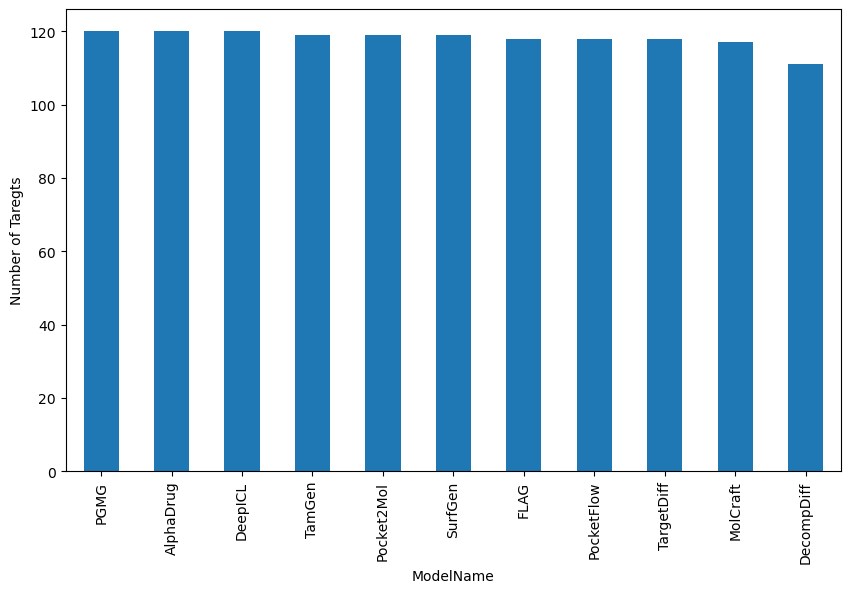

In [68]:
plt.figure(figsize=(10,6))
merged_result_pd['ModelName'].value_counts().plot(kind = 'bar')
plt.ylabel('Number of Taregts')
# plt.title('Number of targets successful generated molecules by different model')

In [71]:
scaffold_molecule_pd = merged_result_pd.groupby('ModelName').agg(list)[['Finded_Smiles_Num','Finded_Scaffolds_Num']].reset_index()#.apply(lambda x: sum(x)/120,axis = 1).plot(kind = 'bar',figsize=(10,6))
scaffold_molecule_pd['Mean_Finded_Scaffolds_Num'] = scaffold_molecule_pd['Finded_Scaffolds_Num'].apply(lambda x: sum(x)/120)
scaffold_molecule_pd['Mean_Finded_Smiles_Num'] = scaffold_molecule_pd['Finded_Smiles_Num'].apply(lambda x: sum(x)/120)
#  统计找到骨架和找到分子的靶点数目
scaffold_molecule_pd['Number_of_Finded_Scaffolds'] = scaffold_molecule_pd['Finded_Scaffolds_Num'].apply(lambda x: np.sum(np.array(x, dtype=bool)))
scaffold_molecule_pd['Number_of_Finded_Smiles'] = scaffold_molecule_pd['Finded_Smiles_Num'].apply(lambda x: np.sum(np.array(x, dtype=bool)))


# # 统计找到的骨架在训练集中的比例
# scaffold_molecule_pd['FindedScaffoldIsInTrainset'] = merged_result_pd.groupby('ModelName').agg(list)['FindedScaffoldIsInTrainset'].apply(lambda x: np.sum(np.array(x, dtype=bool)))
# # 统计找到的分子在训练集中的比例
# scaffold_molecule_pd['FindedSmilesInTrainset'] = merged_result_pd.groupby('ModelName').agg(list)['FindedSmilesInTrainset'].apply(lambda x: np.sum(np.array(x, dtype=bool)))

In [72]:
scaffold_molecule_pd.dropna()

,ModelName,Finded_Smiles_Num,Finded_Scaffolds_Num,Mean_Finded_Scaffolds_Num,Mean_Finded_Smiles_Num,Number_of_Finded_Scaffolds,Number_of_Finded_Smiles
0,AlphaDrug,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.291667,0.066667,24,6
1,DecompDiff,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 1, 0, 4, 1, 1, 4, 7, 0, 5, 4, 5, 0, 3, 2, ...",4.033333,0.025000,93,2
2,DeepICL,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, ...",0.391667,0.000000,44,0
3,FLAG,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 2, 0, 1, 2, 3, 1, 0, 3, 2, 0, 0, 1, ...",1.450000,0.000000,79,0
4,MolCraft,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 2, 0, 5, 0, 1, 7, 5, 10, 0, 5, 4, 2, 0, 5,...",4.458333,0.075000,97,4
5,PGMG,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 1, 0, 6, 0, 0, 2, 10, 6, 0, 7, 2, 1, 0, 3,...",2.750000,0.041667,80,3
6,Pocket2Mol,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 2, 0, 1, 3, 7, 6, 0, 4, 2, 3, 0, 4, ...",2.941667,0.000000,87,0
7,PocketFlow,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 1, 2, 9, 0, 1, 8, 8, 10, 0, 5, 4, 6, 0, 3,...",5.558333,0.025000,102,3
8,SurfGen,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 2, 0, 0, 0, 3, 1, 0, 0, 1, 1, 0, 2, ...",1.141667,0.033333,68,3
9,TamGen,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 1, 1, 5, 3, 0, 6, 2, 2, 1, 2, 1, 4, 0, 3, ...",3.416667,0.483333,101,23


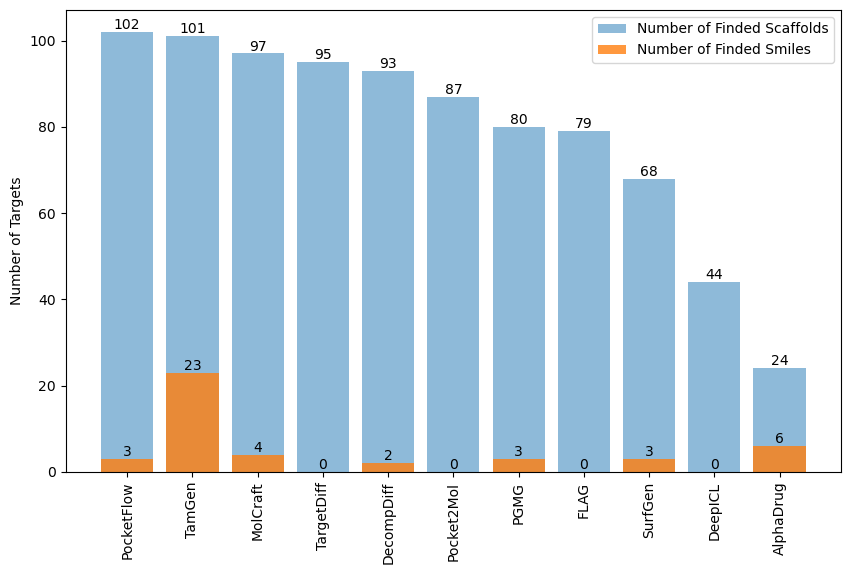

In [193]:
scaffold_molecule_pd = scaffold_molecule_pd.sort_values(by = 'Number_of_Finded_Scaffolds',ascending = False)
plt.figure(figsize=(10,6))
bars1 = plt.bar(scaffold_molecule_pd['ModelName'],scaffold_molecule_pd['Number_of_Finded_Scaffolds'],label = 'Number of Finded Scaffolds',alpha = 0.5)
bars2 = plt.bar(scaffold_molecule_pd['ModelName'],scaffold_molecule_pd['Number_of_Finded_Smiles'],label = 'Number of Finded Smiles',alpha = 0.8)
# scaffold_molecule_pd[['Number_of_Finded_Scaffolds']].plot(kind = 'bar',xlabel = 'ModelName',ylabel = 'Number of Targets',label = 'Number of Finded Scaffolds')
# scaffold_molecule_pd[['Number_of_Finded_Smiles']].plot(kind = 'bar',label = 'Number of Finded Smiles')
_ = plt.xticks(range(len(scaffold_molecule_pd['ModelName'])),scaffold_molecule_pd['ModelName'],rotation = 90)
# 在柱子上添加具体数值

for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
plt.ylabel('Number of Targets')
plt.legend()

In [74]:
scaffold_molecule_pd.sort_values(by = 'Number_of_Finded_Scaffolds',ascending = False)

,ModelName,Finded_Smiles_Num,Finded_Scaffolds_Num,Mean_Finded_Scaffolds_Num,Mean_Finded_Smiles_Num,Number_of_Finded_Scaffolds,Number_of_Finded_Smiles
7,PocketFlow,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 1, 2, 9, 0, 1, 8, 8, 10, 0, 5, 4, 6, 0, 3,...",5.558333,0.025000,102,3
9,TamGen,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 1, 1, 5, 3, 0, 6, 2, 2, 1, 2, 1, 4, 0, 3, ...",3.416667,0.483333,101,23
4,MolCraft,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 2, 0, 5, 0, 1, 7, 5, 10, 0, 5, 4, 2, 0, 5,...",4.458333,0.075000,97,4
10,TargetDiff,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 0, 3, 0, 1, 3, 5, 4, 0, 3, 1, 4, 0, 2, ...",2.733333,0.000000,95,0
1,DecompDiff,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 1, 0, 4, 1, 1, 4, 7, 0, 5, 4, 5, 0, 3, 2, ...",4.033333,0.025000,93,2
6,Pocket2Mol,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 2, 0, 1, 3, 7, 6, 0, 4, 2, 3, 0, 4, ...",2.941667,0.000000,87,0
5,PGMG,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 1, 0, 6, 0, 0, 2, 10, 6, 0, 7, 2, 1, 0, 3,...",2.750000,0.041667,80,3
3,FLAG,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 2, 0, 1, 2, 3, 1, 0, 3, 2, 0, 0, 1, ...",1.450000,0.000000,79,0
8,SurfGen,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 2, 0, 0, 0, 3, 1, 0, 0, 1, 1, 0, 2, ...",1.141667,0.033333,68,3
2,DeepICL,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, ...",0.391667,0.000000,44,0


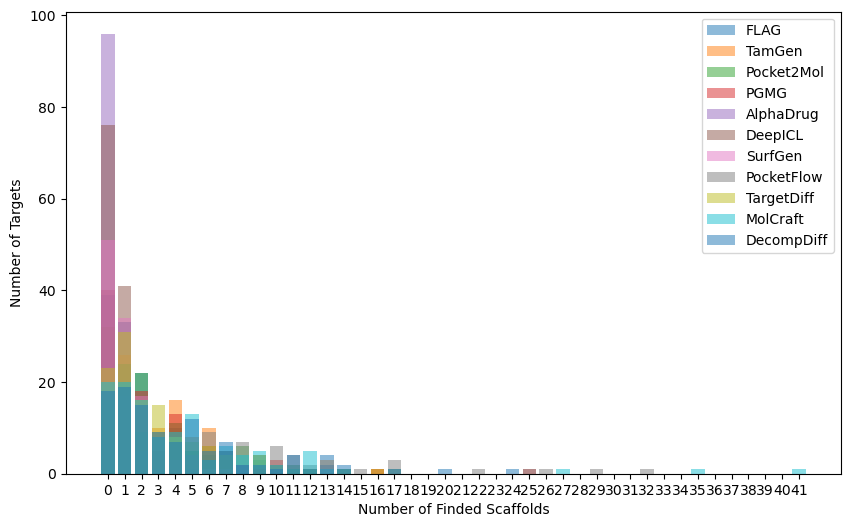

In [75]:
model_names = merged_result_pd['ModelName'].unique()
max_ticks = 0
plt.figure(figsize=(10,6))
for model_name in model_names:
    temp_pd= dict(merged_result_pd[merged_result_pd['ModelName'] == model_name]['Finded_Scaffolds_Num'].value_counts())
    _ = plt.bar(x = list(temp_pd.keys()),height= list(temp_pd.values()),label = model_name,alpha = 0.5)
    # plt.title(model_name)
    max_ticks = max(max_ticks,max(temp_pd.keys()))
    plt.legend()
plt.xticks(range(max_ticks+1))
plt.ylabel('Number of Targets')
plt.xlabel('Number of Finded Scaffolds')

plt.show()
# temp_pd= dict(merged_result_pd[merged_result_pd['ModelName'] == 'TamGen']['Finded_Scaffolds_Num'].value_counts())
# _ = plt.hist(x = list(temp_pd.keys()),weights = list(temp_pd.values()),bins = 20)

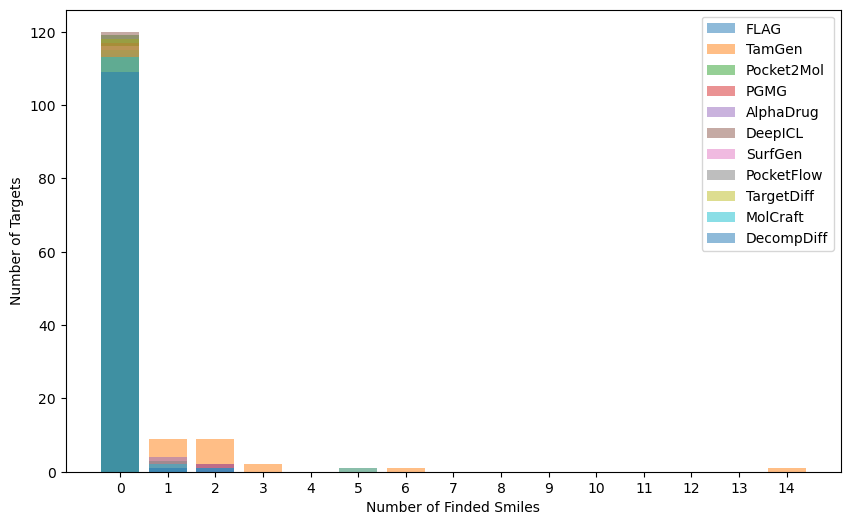

In [76]:
model_names = merged_result_pd['ModelName'].unique()
max_ticks = 0
plt.figure(figsize=(10,6))
for model_name in model_names:
    temp_pd= dict(merged_result_pd[merged_result_pd['ModelName'] == model_name]['Finded_Smiles_Num'].value_counts())
    _ = plt.bar(x = list(temp_pd.keys()),height= list(temp_pd.values()),label = model_name,alpha = 0.5)
    # plt.title(model_name)
    max_ticks = max(max_ticks,max(temp_pd.keys()))
    plt.legend()
plt.xticks(range(max_ticks+1))
plt.ylabel('Number of Targets')
plt.xlabel('Number of Finded Smiles')

plt.show()
# temp_pd= dict(merged_result_pd[merged_result_pd['ModelName'] == 'TamGen']['Finded_Scaffolds_Num'].value_counts())
# _ = plt.hist(x = list(temp_pd.keys()),weights = list(temp_pd.values()),bins = 20)

### 去除crossdock见过的蛋白


In [195]:
import json
with open('/home/datahouse1/caoduanhua/MolGens/SelfConstructedBenchmark/UniprotIDs_duplicated_with_crossdock2020.json','r') as f:
    UniprotId_in_crossdock = json.load(f)
# dict(Counter(duplicated_uniprot_ids))

In [196]:
scaffold_deduplicated_pd = merged_result_pd[~merged_result_pd['UniprotID'].isin(UniprotId_in_crossdock.keys())]
# agg info
scaffold_deduplicated_pd =scaffold_deduplicated_pd.groupby('ModelName').agg(list)[['Finded_Smiles_Num','Finded_Scaffolds_Num']].reset_index()#.apply(lambda x: sum(x)/120,axis = 1).plot(kind = 'bar',figsize=(10,6))
scaffold_deduplicated_pd['Mean_Finded_Scaffolds_Num'] = scaffold_deduplicated_pd['Finded_Scaffolds_Num'].apply(lambda x: sum(x)/35)
scaffold_deduplicated_pd['Mean_Finded_Smiles_Num'] = scaffold_deduplicated_pd['Finded_Smiles_Num'].apply(lambda x: sum(x)/35)
#  统计找到骨架和找到分子的靶点数目
scaffold_deduplicated_pd['Number_of_Finded_Scaffolds'] = scaffold_deduplicated_pd['Finded_Scaffolds_Num'].apply(lambda x: np.sum(np.array(x, dtype=bool)))
scaffold_deduplicated_pd['Number_of_Finded_Smiles'] = scaffold_deduplicated_pd['Finded_Smiles_Num'].apply(lambda x: np.sum(np.array(x, dtype=bool)))

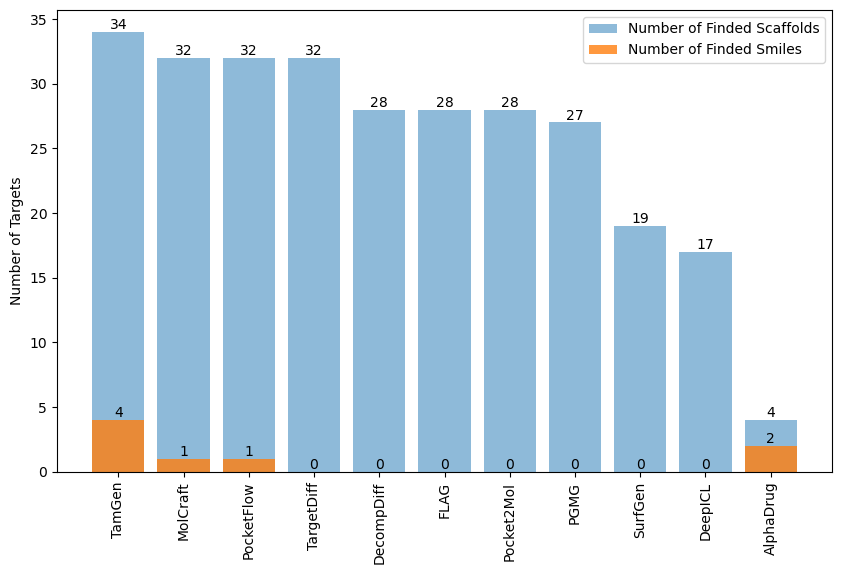

In [197]:
# len(UniprotId_in_crossdock.keys())

scaffold_deduplicated_pd = scaffold_deduplicated_pd.sort_values(by = 'Number_of_Finded_Scaffolds',ascending = False)
plt.figure(figsize=(10,6))
bars1 = plt.bar(scaffold_deduplicated_pd['ModelName'],scaffold_deduplicated_pd['Number_of_Finded_Scaffolds'],label = 'Number of Finded Scaffolds',alpha = 0.5)
bars2 = plt.bar(scaffold_deduplicated_pd['ModelName'],scaffold_deduplicated_pd['Number_of_Finded_Smiles'],label = 'Number of Finded Smiles',alpha = 0.8)
# scaffold_molecule_pd[['Number_of_Finded_Scaffolds']].plot(kind = 'bar',xlabel = 'ModelName',ylabel = 'Number of Targets',label = 'Number of Finded Scaffolds')
# scaffold_molecule_pd[['Number_of_Finded_Smiles']].plot(kind = 'bar',label = 'Number of Finded Smiles')
_ = plt.xticks(range(len(scaffold_deduplicated_pd['ModelName'])),scaffold_deduplicated_pd['ModelName'],rotation = 90)
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
plt.ylabel('Number of Targets')
plt.legend()


In [80]:
scaffold_deduplicated_pd

,ModelName,Finded_Smiles_Num,Finded_Scaffolds_Num,Mean_Finded_Scaffolds_Num,Mean_Finded_Smiles_Num,Number_of_Finded_Scaffolds,Number_of_Finded_Smiles
9,TamGen,"[0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, ...","[4, 6, 2, 1, 13, 1, 1, 7, 6, 4, 4, 2, 6, 1, 1,...",3.400000,0.171429,34,4
4,MolCraft,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 7, 5, 4, 14, 1, 1, 1, 11, 5, 5, 12, 2, 0, ...",4.428571,0.028571,32,1
7,PocketFlow,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 8, 5, 4, 17, 0, 1, 4, 8, 4, 6, 25, 2, 1, 3...",5.800000,0.028571,32,1
10,TargetDiff,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 3, 3, 1, 7, 1, 1, 1, 5, 3, 5, 9, 2, 1, 1, ...",2.942857,0.000000,32,0
1,DecompDiff,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 4, 5, 4, 10, 4, 1, 1, 5, 5, 11, 2, 3, 1, 2...",3.628571,0.000000,28,0
3,FLAG,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 3, 2, 3, 0, 1, 1, 3, 1, 3, 2, 1, 0, 1, ...",1.657143,0.000000,28,0
6,Pocket2Mol,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 3, 4, 2, 12, 0, 1, 2, 4, 2, 5, 17, 1, 1, 2...",2.971429,0.000000,28,0
5,PGMG,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 7, 2, 9, 2, 0, 2, 2, 6, 0, 3, 16, 2, 5,...",3.285714,0.000000,27,0
8,SurfGen,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 5, 0, 0, 2, 1, 2, 0, 0, 3, 1, 1, ...",0.828571,0.000000,19,0
2,DeepICL,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, ...",0.485714,0.000000,17,0


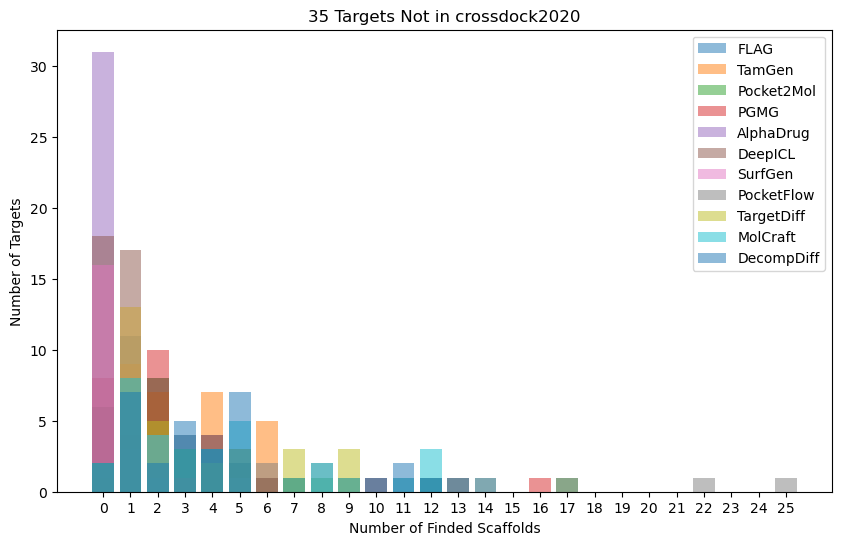

In [81]:
model_names = merged_result_pd['ModelName'].unique()
scaffold_deduplicated_pd = merged_result_pd[~merged_result_pd['UniprotID'].isin(UniprotId_in_crossdock.keys())]
max_ticks = 0
plt.figure(figsize=(10,6))
for model_name in model_names:
    temp_pd= dict(scaffold_deduplicated_pd[scaffold_deduplicated_pd['ModelName'] == model_name]['Finded_Scaffolds_Num'].value_counts())
    _ = plt.bar(x = list(temp_pd.keys()),height= list(temp_pd.values()),label = model_name,alpha = 0.5)
    # plt.title(model_name)
    max_ticks = max(max_ticks,max(temp_pd.keys()))
    plt.legend()
plt.xticks(range(max_ticks+1))
plt.ylabel('Number of Targets')
plt.xlabel('Number of Finded Scaffolds')
plt.title('35 Targets Not in crossdock2020')

plt.show()

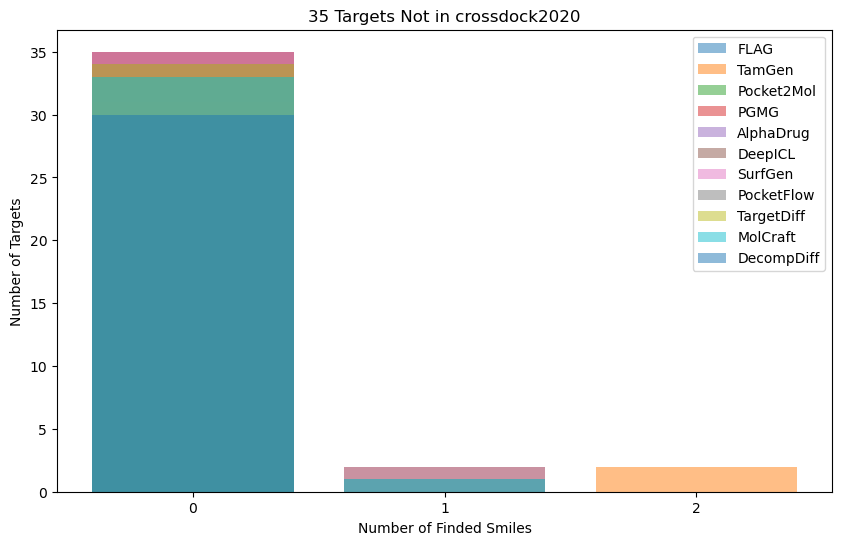

In [82]:
model_names = merged_result_pd['ModelName'].unique()
scaffold_deduplicated_pd = merged_result_pd[~merged_result_pd['UniprotID'].isin(UniprotId_in_crossdock.keys())]
max_ticks = 0
plt.figure(figsize=(10,6))
for model_name in model_names:
    temp_pd= dict(scaffold_deduplicated_pd[scaffold_deduplicated_pd['ModelName'] == model_name]['Finded_Smiles_Num'].value_counts())
    _ = plt.bar(x = list(temp_pd.keys()),height= list(temp_pd.values()),label = model_name,alpha = 0.5)
    # plt.title(model_name)
    max_ticks = max(max_ticks,max(temp_pd.keys()))
    plt.legend()
plt.xticks(range(max_ticks+1))
plt.ylabel('Number of Targets')
plt.xlabel('Number of Finded Smiles')
plt.title('35 Targets Not in crossdock2020')

plt.show()

## 确定一下见过的靶点复现出来的分子是不是都是训练数据里面的

In [120]:
# merged_result_pd[merged_result_pd['Finded_Smiles_Num']!=0].iloc[1].Finded_Smiles[1:-1].split(', ')[0][1:-1]=='N[C@@H](Cc1ccc(O)c(O)c1)C(=O)O'

True

In [284]:
merged_result_pd[merged_result_pd['FindedSmilesIsInTrainset']!=0][['FindedSmilesIsInTrainset','Finded_Smiles_Num','UniprotID','Finded_Smiles']]

,FindedSmilesIsInTrainset,Finded_Smiles_Num,UniprotID,Finded_Smiles
48,1,1,Q07820,['Cc1cc(OCCCc2c(C(=O)O)sc3ccccc23)cc(C)c1Cl']
49,1,2,Q92731,"['O=C(N1CCc2cc(O)ccc2C1)C(F)(F)F', 'Cc1cc(O)c2..."
70,1,1,P10828,['Cc1cc(OCC(=O)O)cc(C)c1Cc1ccc(O)c(C(C)C)c1']
75,3,3,P52732,"['CC(=O)c1cccc(C(SCCN)(c2ccccc2)c2ccccc2)c1', ..."
93,1,2,P48736,['CS(=O)(=O)N1CCN(Cc2cc3nc(-c4cccc(O)c4)nc(N4C...
97,9,14,P00742,['O=C(N[C@H]1CCC[C@H]1NC(=O)c1ccc(Cl)s1)c1ccc(...
101,5,6,P27487,['COc1cc2c(cc1OC)[C@@H]1C[C@H](N)[C@@H](N3C[C@...
104,4,5,P18031,"['O=C(O)C(=O)Nc1sc2c(c1C(=O)O)CCCC2', 'COC(=O)..."
108,1,1,Q03181,['O=C(O)CCCCCOc1ccccc1CN(C(=O)c1ccc(-c2ccco2)c...
109,1,1,P78536,['CC#CCOc1ccc(S(=O)(=O)CCCS)cc1']


## 可视化TamGen训练数据的阳性分子同时把找到的分子可视化


In [452]:
model_name = 'AlphaDrug'
TamGen_pd = merged_result_pd[merged_result_pd['ModelName'] == model_name][merged_result_pd[merged_result_pd['ModelName'] == model_name]['Finded_Smiles_Num'] != 0][['Finded_Smiles_Num','FindedSmilesIsInTrainset','UniprotID','Finded_Smiles','ModelName','Dupliceted_UniprotID']]

In [453]:
merged_result_pd['ModelName'].value_counts()

ModelName
PGMG          120
AlphaDrug     120
DeepICL       120
TamGen        119
Pocket2Mol    119
SurfGen       119
FLAG          118
PocketFlow    118
TargetDiff    118
MolCraft      117
DecompDiff    111
Name: count, dtype: int64

In [454]:
TamGen_pd = TamGen_pd[TamGen_pd['FindedSmilesIsInTrainset'] == 0]
TamGen_pd[['Finded_Smiles_Num','FindedSmilesIsInTrainset','UniprotID','ModelName','Dupliceted_UniprotID']]


,Finded_Smiles_Num,FindedSmilesIsInTrainset,UniprotID,ModelName,Dupliceted_UniprotID
28,1,0,P00519,AlphaDrug,False
47,1,0,P24941,AlphaDrug,True
53,2,0,P00374,AlphaDrug,True
84,2,0,P52333,AlphaDrug,True
85,1,0,P35968,AlphaDrug,False
97,1,0,P11362,AlphaDrug,True


In [463]:

# [i[1:-1] for i in x.Finded_Scaffolds[1:-1].split(', ')]
selected_id = 'P24941'
Finded_Smiles = [i[1:-1] for i in TamGen_pd[TamGen_pd['UniprotID']==selected_id ].Finded_Smiles.tolist()[0][1:-1].split(', ') if i != '']
Finded_Smiles = [Chem.MolToSmiles(Chem.MolFromSmiles(i)) for i in Finded_Smiles]



In [464]:
#### 找到的分子在训练集中的分子
# TamGen_pd
# selected_id = 'P00742'
ref_smiles = [Chem.MolToSmiles(Chem.MolFromSmiles(i)) for i in crossdock2020_duplicated_uniprotId_map_smiles_in_trainset[selected_id]['smiles'] if i != '']
dup_with_trainset = list(set(Finded_Smiles).intersection(set(ref_smiles)))
# dup_with_trainset_images = [Draw.MolToImage(Chem.MolFromSmiles(i))  for i in dup_with_trainset]
### 找到的分子不在训练集中的分子
Finded_new_Smiles = list(set(Finded_Smiles) - set(dup_with_trainset))

In [465]:
# Finded_Smiles 
Draw.MolsToGridImage([Chem.MolFromSmiles(i) for i in dup_with_trainset],molsPerRow = 5,subImgSize = (200,200),legends = [])
# merge multi Draw into single image




[14:23:19] 

****
Pre-condition Violation
no draw context
Violation occurred on line 214 in file /home/conda/feedstock_root/build_artifacts/rdkit_1696166555430/work/Code/GraphMol/MolDraw2D/MolDraw2DCairo.cpp
Failed Expression: dp_cr
****



RuntimeError: Pre-condition Violation
	no draw context
	Violation occurred on line 214 in file Code/GraphMol/MolDraw2D/MolDraw2DCairo.cpp
	Failed Expression: dp_cr
	RDKIT: 2023.03.3
	BOOST: 1_82


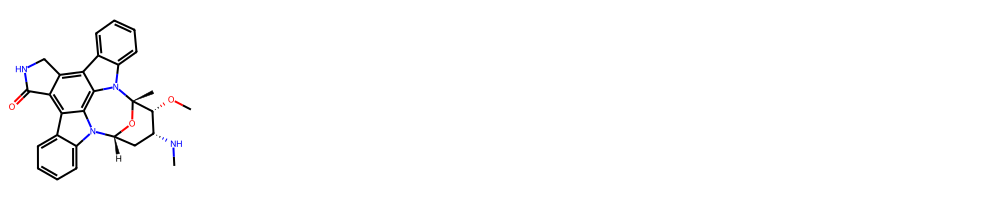

In [466]:
Finded_new_Smiles = list(set(Finded_Smiles) - set(dup_with_trainset))
Draw.MolsToGridImage([Chem.MolFromSmiles(i) for i in Finded_new_Smiles],molsPerRow = 5,subImgSize = (200,200))

## 对每个新找到的分子都在训练数据的分子中做一下公共子结构检索


## 对每个新找到的分子都在训练数据的分子中做一下公共子结构检索


/home/datahouse1/caoduanhua/miniforge3/envs/cbgbench/lib/python3.11/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


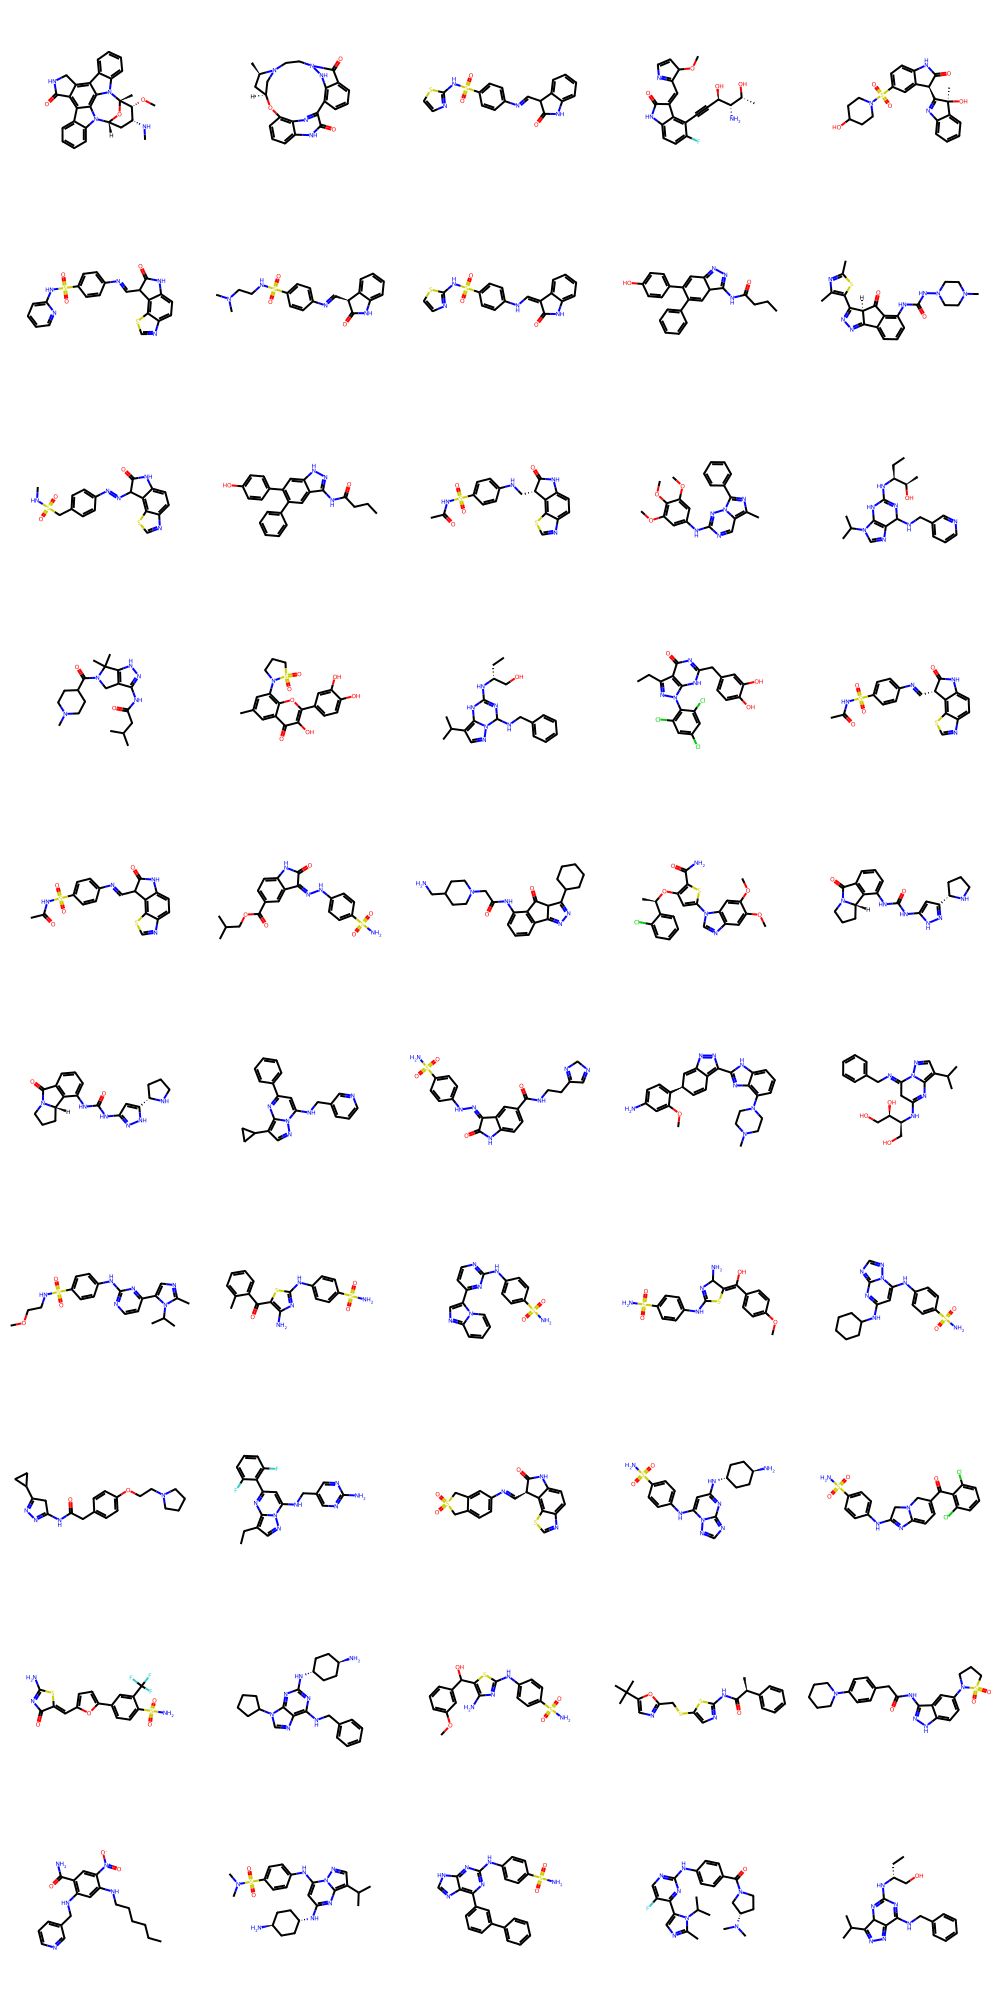

In [467]:

ref_Finded_smiles = Finded_new_Smiles[0]
## 找到ref_smiles 和训练数据分子的相似性最高的分子
similarity = []
for smiles in ref_smiles:
    if smiles == '':
        continue
    ref_mol = Chem.MolFromSmiles(smiles)
    ref_Finded_mol = Chem.MolFromSmiles(ref_Finded_smiles)

    ref_fp = AllChem.GetMorganFingerprintAsBitVect(ref_mol, 2, nBits=2048)  # 使用Morgan指纹（2048位）
    ref_Finded_fp = AllChem.GetMorganFingerprintAsBitVect(ref_Finded_mol, 2, nBits=2048)
    sim = DataStructs.TanimotoSimilarity(ref_fp, ref_Finded_fp)
    similarity.append((sim,smiles))
similarity = sorted(similarity,key = lambda x: x[0],reverse = True)
top_similarity = [ref_Finded_smiles] + [item[1] for item in similarity]
Draw.MolsToGridImage([Chem.MolFromSmiles(i) for i in top_similarity],molsPerRow = 5,subImgSize = (200,200))